In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

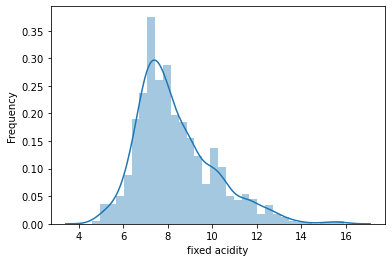

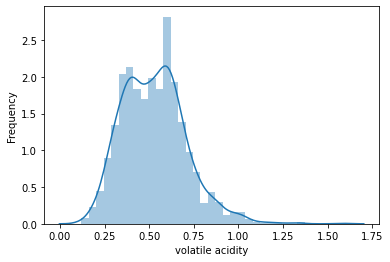

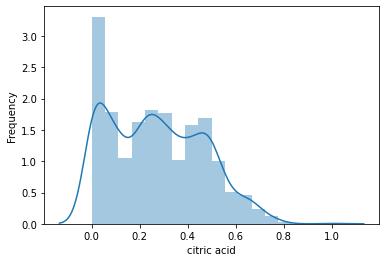

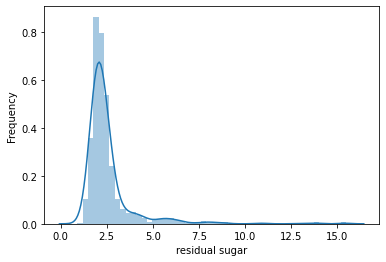

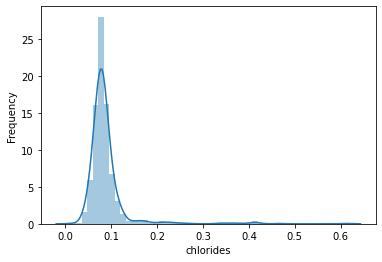

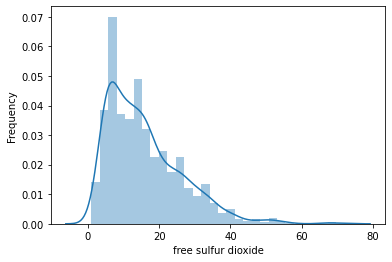

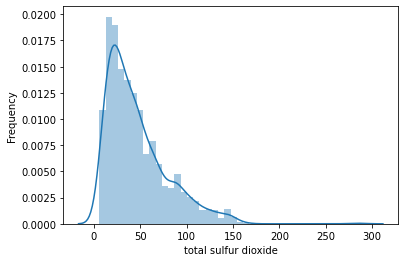

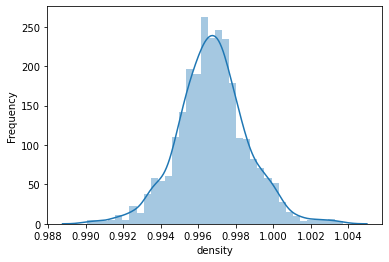

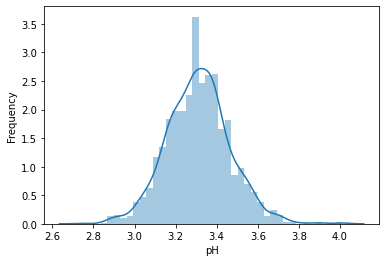

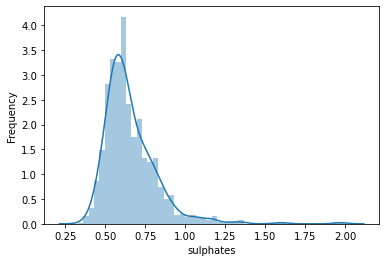

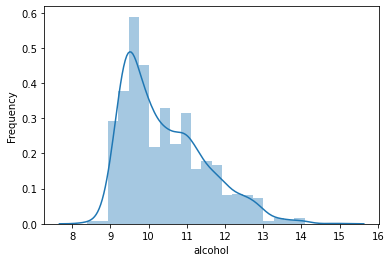

In [7]:
for col in x:
    plt.figure()
    sns.distplot(x[col])
    plt.ylabel('Frequency')
    plt.show()

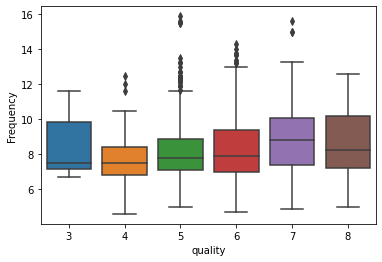

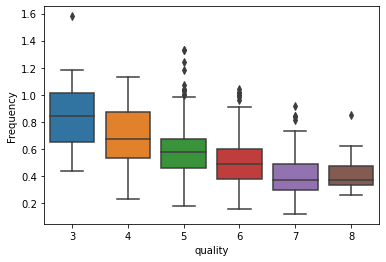

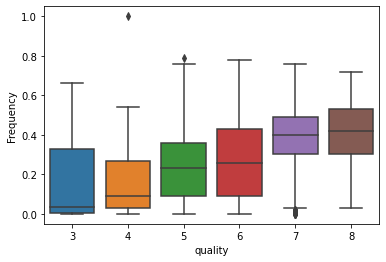

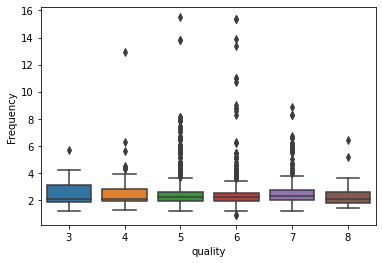

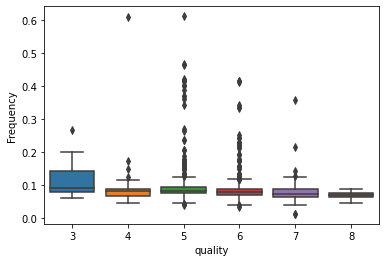

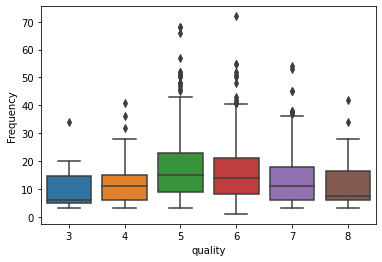

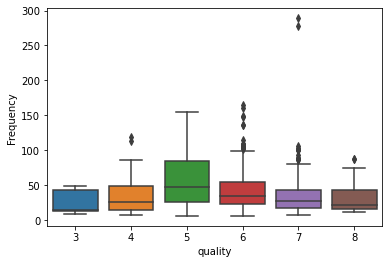

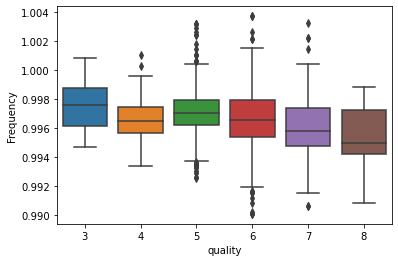

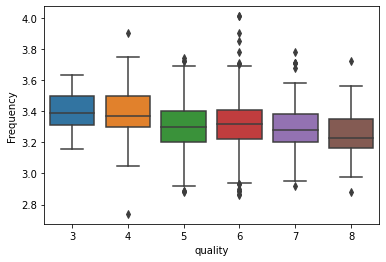

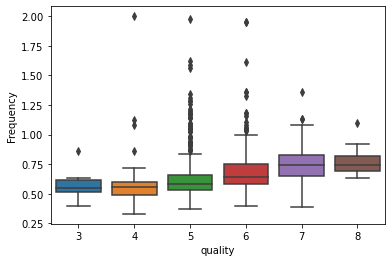

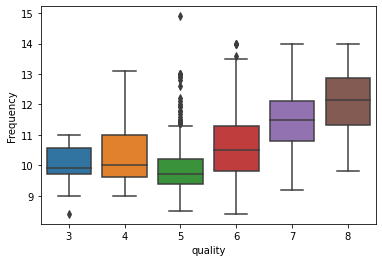

In [8]:
for col in x:
    plt.figure()
    sns.boxplot(data=data,x='quality',y=col)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

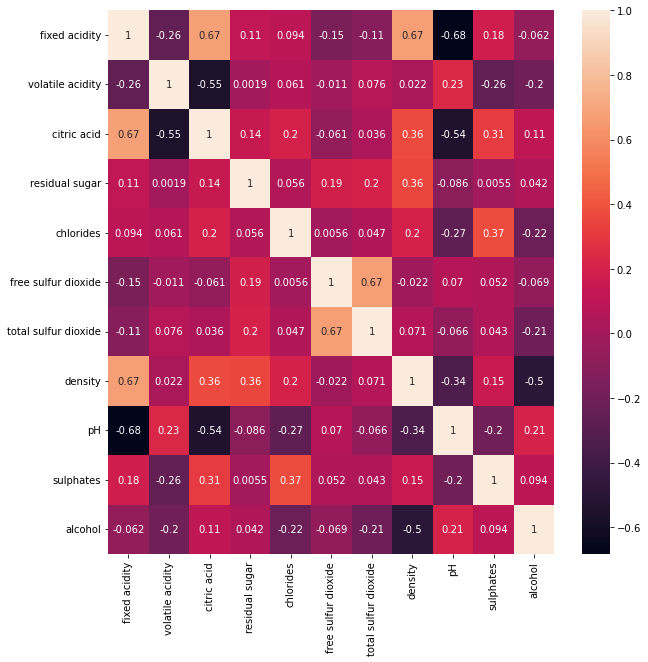

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
model.score(x_train,y_train)

1.0

In [15]:
y_pred=model.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.05      0.06        21
           5       0.67      0.69      0.68       207
           6       0.64      0.57      0.60       195
           7       0.42      0.62      0.50        52
           8       0.33      0.33      0.33         3

    accuracy                           0.60       480
   macro avg       0.36      0.38      0.36       480
weighted avg       0.60      0.60      0.59       480



In [17]:
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [18]:
model1=DecisionTreeClassifier()
df=create_model(model1)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.10      0.11        21
           5       0.66      0.69      0.67       207
           6       0.62      0.55      0.58       195
           7       0.46      0.62      0.53        52
           8       0.25      0.33      0.29         3

    accuracy                           0.59       480
   macro avg       0.36      0.38      0.36       480
weighted avg       0.59      0.59      0.59       480



In [19]:
lr=LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.64      0.76      0.70       207
           6       0.55      0.64      0.59       195
           7       0.75      0.12      0.20        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.32      0.25      0.25       480
weighted avg       0.58      0.60      0.56       480



LogisticRegression()

In [20]:
df.score(x_train,y_train)

1.0

In [21]:
df.feature_importances_

array([0.04896795, 0.09759219, 0.06399005, 0.07563168, 0.09126384,
       0.08624457, 0.12180696, 0.03255015, 0.0916432 , 0.12255991,
       0.16774949])

In [22]:
#purning
df1=DecisionTreeClassifier(max_depth=8)
create_model(df1)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.05      0.08        21
           5       0.64      0.75      0.69       207
           6       0.62      0.57      0.60       195
           7       0.44      0.42      0.43        52
           8       0.00      0.00      0.00         3

    accuracy                           0.61       480
   macro avg       0.34      0.30      0.30       480
weighted avg       0.59      0.61      0.59       480



DecisionTreeClassifier(max_depth=8)

In [23]:
df2=DecisionTreeClassifier(min_samples_leaf=50)
df3=create_model(df2)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.73      0.68       207
           6       0.58      0.51      0.55       195
           7       0.44      0.56      0.49        52
           8       0.00      0.00      0.00         3

    accuracy                           0.59       480
   macro avg       0.27      0.30      0.29       480
weighted avg       0.55      0.59      0.57       480



In [24]:
df3=DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")
df4=create_model(df3)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.64      0.66      0.65       207
           6       0.53      0.64      0.58       195
           7       0.39      0.25      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.57       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.54      0.57      0.55       480



In [25]:
#cross_validation
from sklearn.model_selection import cross_val_score

In [26]:
m=cross_val_score(df3,x,y,cv=4)

In [27]:
m

array([0.5975   , 0.565    , 0.54     , 0.5764411])

In [28]:
m.mean()

0.5697352756892231

In [29]:
m=cross_val_score(df1,x,y,cv=2)
m

array([0.475     , 0.52315394])

In [30]:
#whats the depth
model.get_depth()

21

# imbalanced data

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=4)

In [33]:
x_train_rs, y_train_rs = ros.fit_resample(x_train,y_train)

In [34]:
pd.Series(y_train_rs).value_counts()

5    474
6    474
7    474
8    474
4    474
3    474
Name: quality, dtype: int64

In [35]:
lr3 = LogisticRegression()
lr3.fit(x_train_rs, y_train_rs)

LogisticRegression()

In [36]:
y_pred3 = lr3.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           3       0.02      0.50      0.04         2
           4       0.11      0.43      0.17        21
           5       0.72      0.39      0.50       207
           6       0.57      0.40      0.47       195
           7       0.23      0.17      0.20        52
           8       0.02      0.33      0.03         3

    accuracy                           0.37       480
   macro avg       0.28      0.37      0.24       480
weighted avg       0.57      0.37      0.44       480



# Random Under Sampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

In [39]:
x_sample1, y_sample1 = rus.fit_resample(x_train,y_train)

In [40]:
pd.Series(y_sample1).value_counts()

3    8
4    8
5    8
6    8
7    8
8    8
Name: quality, dtype: int64

In [41]:
lr2 = LogisticRegression()
lr2.fit(x_sample1,y_sample1)

LogisticRegression()

In [42]:
y_pred4 = lr2.predict(x_test)

In [43]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           3       0.02      0.50      0.04         2
           4       0.06      0.33      0.11        21
           5       0.62      0.28      0.39       207
           6       0.43      0.24      0.31       195
           7       0.31      0.37      0.34        52
           8       0.02      0.33      0.03         3

    accuracy                           0.28       480
   macro avg       0.24      0.34      0.20       480
weighted avg       0.48      0.28      0.33       480



In [44]:
samples=[3,4,5,6,7,8]
s=pd.Series(samples)
type(s)
def convert(n):
    if n>5:
        return 1
    else:
        return 0

s1=s.apply(convert)
s1

0    0
1    0
2    0
3    1
4    1
5    1
dtype: int64

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(n_estimators=80,max_depth=10)
rf.fit(x_train_rs,y_train_rs)

RandomForestClassifier(max_depth=10, n_estimators=80)

In [47]:
y_pred2=rf.predict(x_test)

In [48]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.10      0.15        21
           5       0.69      0.83      0.75       207
           6       0.69      0.53      0.60       195
           7       0.47      0.62      0.53        52
           8       0.17      0.33      0.22         3

    accuracy                           0.64       480
   macro avg       0.39      0.40      0.38       480
weighted avg       0.64      0.64      0.63       480



## converting into multiclass dataset

In [49]:
df=pd.read_csv('winequality-red.csv')

In [50]:
def multiclass_to_binary(n):
    if n>=6:
        return 1
    else:
        return 0

In [51]:
multiclass_to_binary(8)

1

In [52]:
df['quality'].apply(multiclass_to_binary)
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [53]:
df['binary_quality']=df['quality'].apply(multiclass_to_binary)

In [54]:
df['binary_quality'].value_counts()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [55]:
x=df.drop(["binary_quality","quality"],axis=1)
x
y=df["binary_quality"]

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [57]:
rf=RandomForestClassifier(n_estimators=80,max_depth=10)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=80)

In [58]:
y_pred2 = rf.predict(X_test)

In [59]:
print(classification_report(Y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       230
           1       0.82      0.80      0.81       250

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

